In [1]:
import numpy as np
import pandas as pd
import scipy

from scipy import signal as signal
from math import *
from matplotlib import pyplot as plt
import scipy.io
import os
import scipy.io.wavfile as wav

from scipy.fftpack import fft
from scipy.signal import lfilter

In [2]:
##Function to convert the mat lab data into csv for pandas

def convert_to_CSV(data,filename):
    for i in data:
        if '__' not in i and 'readme' not in i:
            np.savetxt((filename+".csv"),data[i],delimiter=',')

In [3]:
#scipy to load matlab files
#takes in matlab file path name
def load(matlabfile):
    matdata = scipy.io.loadmat(matlabfile)
    data = matdata['data']
    return data

In [4]:
#normal plotting function
#takes in data we want to plot, name of the file
#saves it as a png file
def plot(data, filename):
    plt.figure(figsize=(20,10))##change the size of the charts
    plt.plot(data)
    plt.show()
    plt.savefig(filename+".png",bbox_inches='tight')

In [12]:
#butter filter
#data is the thing we want to filter
#to edit the params of the butter filter, change the function variables inside here
def butter(data , filename):
    b, a = signal.butter(20, .3, 'low', analog=False)#our defult values
    filtered = signal.filtfilt(b, a, data, method='gust')#applying the filter
    fil = filtered.astype(np.int16)
    plt.figure(figsize=(20,10))##change the size of the charts
    plt.plot(fil)
    plt.show()
    plt.savefig("Butter_"+filename+".png",bbox_inches='tight')
    return fil 

In [23]:
#weiner
def wiener(data, filename):
    fil = signal.wiener(data, mysize = 3)
    fil = fil.astype(np.int16)
    plt.figure(figsize=(20,10))##change the size of the charts
    plt.plot(fil)
    plt.show()
    plt.savefig("wiener_"+filename+".png",bbox_inches='tight')
    return fil

In [28]:
#cheby1
def cheby1(data , filename):
    b, a = signal.cheby1(20, 3, .3, 'low',analog= False, output='ba')#our defult values
    filtered = signal.filtfilt(b, a, data, method='gust')#applying the filter
    fil = filtered.astype(np.int16)
    plt.figure(figsize=(20,10))##change the size of the charts
    plt.plot(fil)
    plt.show()
    plt.savefig("cheby1_"+filename+".png",bbox_inches='tight')
    
    return fil 

In [6]:
#plots fft and saves it as png
#takes in the wav file name, the name we want our png to be
def fft_fig(wavfilename, filename):
    fs, data = wav.read(wavfilename+".wav")
    a = data.T 
    b=[(ele/2**8.)*2-1 for ele in a] 
    c = fft(b) 

    plt.figure(figsize=(20,10))
    plt.axis([0,fs/2,0,abs(max(c))])
    plt.plot(abs(c),'r') 
    plt.show()
    plt.savefig(filename+".png",bbox_inches='tight')


In [8]:
#Takes in our data, saves it as a wav file
def save_wav(data, filename, FS):
    wav.write(filename+".wav", FS, data)

In [ ]:
#plays the sound using os
#takes in wav file name
def play(filename):
    os.system(filename)

Below is just testing of the above functions

In [9]:
FS, female = wav.read('CF3_amp100.wav')

In [10]:
FS

10666

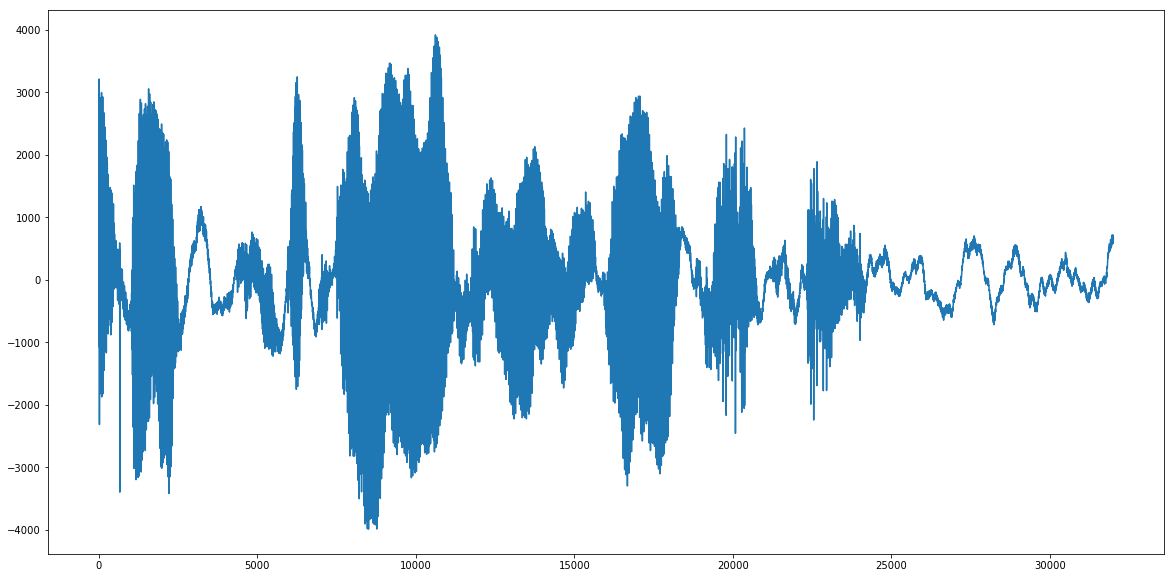

In [13]:
butterfemale = butter(female, 'female')

In [14]:
save_wav(butterfemale, 'butterfemale', FS)

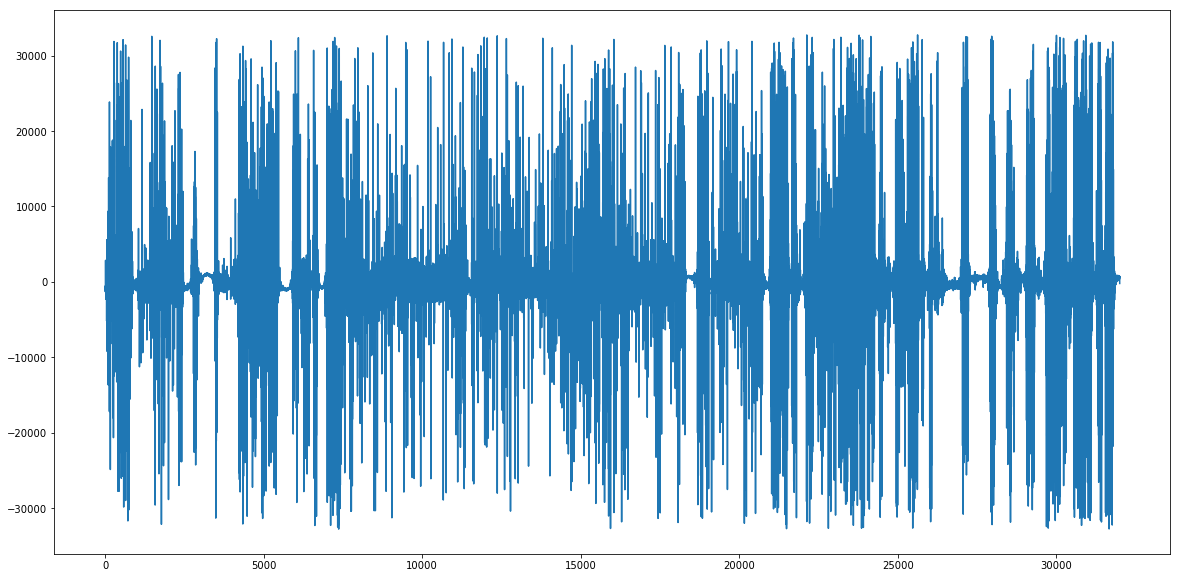

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U7') dtype('<U7') dtype('<U7')

In [24]:
wienerfemale = wiener(female, female)

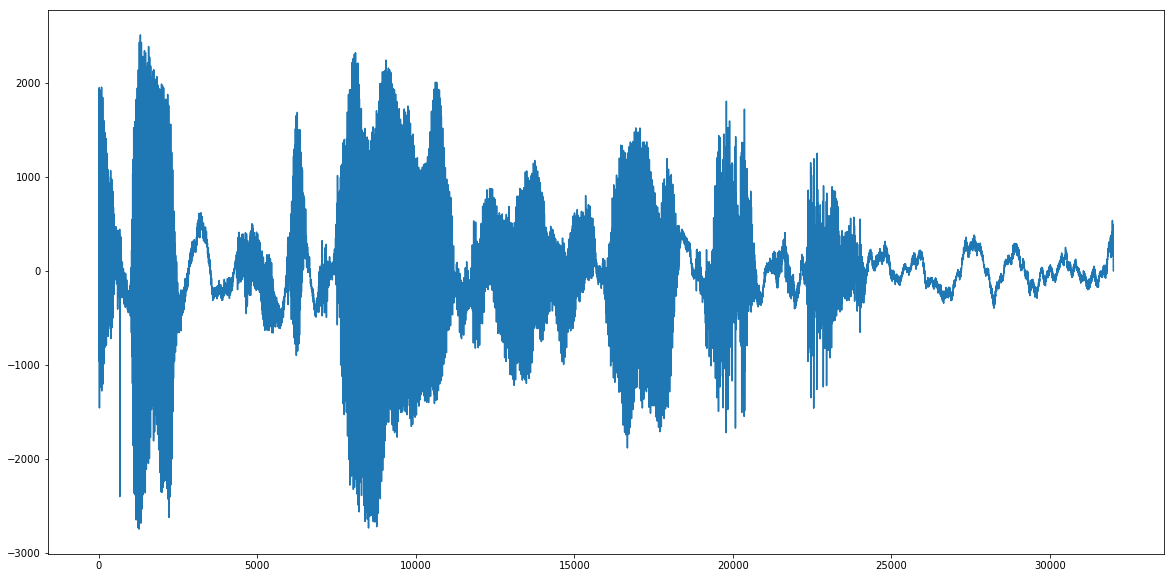

In [29]:
femalecheby = cheby1(female, 'female')

In [31]:
save_wav(femalecheby, 'femalecheby', FS)